## Group 5 Final Presentation - Vanilla CNN and Fine-Tune VGG16 - for Vegetable Classification

- Nathan Garrity (Student number: 8767594)
- Jun He (Student number: 8903073)

### **Introduction**

#### Framing the Problem

This notebook's goal is to train and fine tune a CNN (VGG16) to predict images of different vegetables, then evaluate our findings based on our models results.

- This project uses a dataset from kaggle with hundreds of images of vegetables
- After this intoduction, we will explore the data, such as the number of files split between the training, test and validation folders, image dimensions, etc
- After Data Exploration, we will train, and fine tune a VGG16 model to best fit our image data properly
- We will evaluate the preformance of the best model. We'll look into accuracy, confusion metric, precision, recall, F1-score, precision-recall curve for the model.
- We will explore examples in which our models failed to predict correctly.

### **Data Exploration**

##### Dataset (Source: [Vegetable Image Dataset](https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset/data))

The dataset contains 21000 images unique images of 15 different classes. I have modified the dataset and reduced the classes to 10 for training purposes.

Image classes in dataset:
- Bean
- Broccoli
- Cabbage
- Capsicum
- Carrot
- Cauliflower
- Cucumber
- Potato
- Pumpkin
- Tomato

I have **reduced the dataset to 2000 images for training (200 in each class), 2000 for testing, and 1000 for validation (100 in each class)**. 

#### Get the Data:

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pathlib

data_folder = pathlib.Path('../data/kaggle_vegetables_small')

In [30]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    "data/kaggle_vegetables_small/train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    "data/kaggle_vegetables_small/validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    "data/kaggle_vegetables_small/test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.
Found 2000 files belonging to 10 classes.


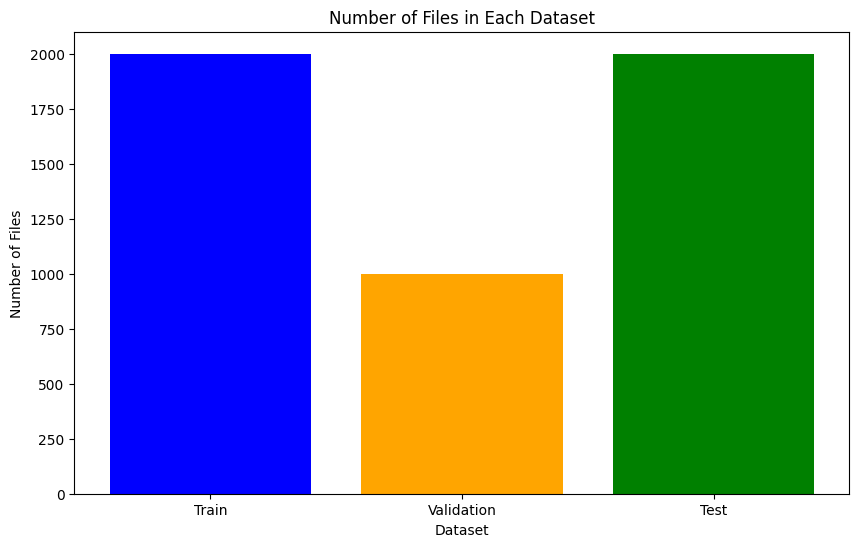

In [31]:
import matplotlib.pyplot as plt
# Function to count the number of files in a dataset
def count_files(dataset):
    count = 0
    for _ in dataset.unbatch():
        count += 1
    return count

# Get the number of files in each dataset
train_files = count_files(train_dataset)
validation_files = count_files(validation_dataset)
test_files = count_files(test_dataset)

# Plot the number of files using a bar chart
datasets = ['Train', 'Validation', 'Test']
file_counts = [train_files, validation_files, test_files]

plt.figure(figsize=(10, 6))
plt.bar(datasets, file_counts, color=['blue', 'orange', 'green'])
plt.title('Number of Files in Each Dataset')
plt.xlabel('Dataset')
plt.ylabel('Number of Files')
plt.show()

### **Data Preprocessing**

### **Modeling**

In [47]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')  # Assuming 10 classes for your vegetables
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('data/kaggle_vegetables_small/train', target_size=(224, 224), batch_size=32, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory('data/kaggle_vegetables_small/validation', target_size=(224, 224), batch_size=32, class_mode='categorical')

model.fit(train_generator, epochs=10, validation_data=validation_generator, callbacks=callbacks)

loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy}')

Found 2000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


c:\Users\natha\OneDrive\Desktop\College\Year 4 - Fall\CSCN8010\CSCN8010_Repo\CSCN8010_classical_ml_123\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.4417 - loss: 3.3077 - val_accuracy: 0.9320 - val_loss: 0.2403
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 194s 3s/step - accuracy: 0.9462 - loss: 0.1898 - val_accuracy: 0.9890 - val_loss: 0.0937
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.9791 - loss: 0.0930 - val_accuracy: 0.9810 - val_loss: 0.0799
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 190s 3s/step - accuracy: 0.9928 - loss: 0.0479 - val_accuracy: 0.9880 - val_loss: 0.0566
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 183s 3s/step - accuracy: 0.9952 - loss: 0.0289 - val_accuracy: 0.9800 - val_loss: 0.0643
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 186s 3s/step - accuracy: 0.9943 - loss: 0.0315 - val_accuracy: 0.9830 - val_loss: 0.0568
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 191s 3s/step - accuracy: 0.9984 - loss: 0.0158 - val_accuracy: 0.9830 - val_loss: 0.0520
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 190s 3s/step - accuracy: 0.9996 - loss: 0.0117 - val_accuracy: 0.9780 - v

In [63]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')  # Assuming 10 classes for your vegetables
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('data/kaggle_vegetables_small/train', target_size=(224, 224), batch_size=32, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory('data/kaggle_vegetables_small/validation', target_size=(224, 224), batch_size=32, class_mode='categorical')

checkpoint = ModelCheckpoint('model/best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

history = model.fit(train_generator, epochs=10, validation_data=validation_generator, callbacks=[checkpoint])


Found 2000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


c:\Users\natha\OneDrive\Desktop\College\Year 4 - Fall\CSCN8010\CSCN8010_Repo\CSCN8010_classical_ml_123\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 223s 4s/step - accuracy: 0.5222 - loss: 2.4411 - val_accuracy: 0.9220 - val_loss: 0.2406
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 209s 3s/step - accuracy: 0.9468 - loss: 0.1744 - val_accuracy: 0.9740 - val_loss: 0.1163
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 230s 4s/step - accuracy: 0.9774 - loss: 0.0798 - val_accuracy: 0.9750 - val_loss: 0.0766
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 255s 4s/step - accuracy: 0.9948 - loss: 0.0409 - val_accuracy: 0.9760 - val_loss: 0.0844
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 271s 4s/step - accuracy: 0.9958 - loss: 0.0308 - val_accuracy: 0.9830 - val_loss: 0.0575
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 238s 4s/step - accuracy: 0.9917 - loss: 0.0302 - val_accuracy: 0.9780 - val_loss: 0.0622
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 214s 3s/step - accuracy: 0.9984 - loss: 0.0146 - val_accuracy: 0.9780 - val_loss: 0.0582
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 210s 3s/step - accuracy: 0.9992 - loss: 0.0118 - val_accuracy: 0.9770 - v

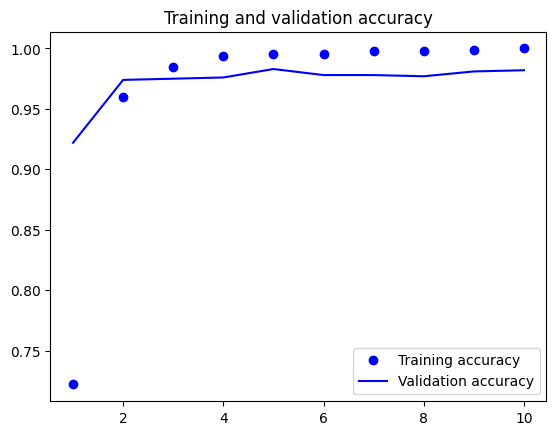

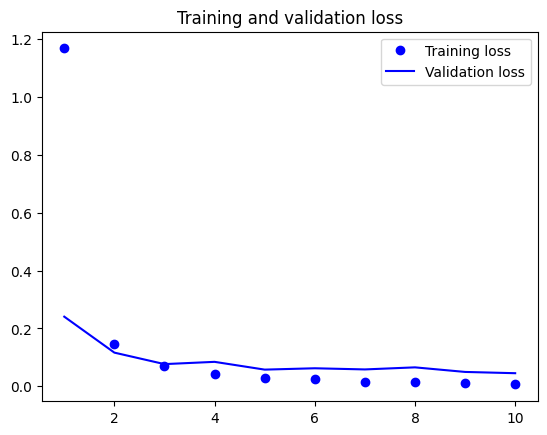

In [67]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Overfitting is not evident here, both training and validation accuracy stay consistant and follows a similar trend to one another. 

## **Evaluation**

Neural Network Evaluation:

In [3]:
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint

# Load the best saved model
best_model = load_model("./model/best_model.keras")

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('data/kaggle_vegetables_small/test', target_size=(224, 224), batch_size=32, class_mode='categorical')

Found 2000 images belonging to 10 classes.


Generating predicitons on the Test Dataset and Test Accuracy:

In [23]:
import numpy as np
predictions = best_model.predict(test_generator)

y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

loss, accuracy = best_model.evaluate(test_generator)
print(f'Test accuracy: {accuracy}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.9781 - loss: 0.0671
Test accuracy: 0.9804999828338623


In [24]:
from sklearn.metrics import classification_report

class_names = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

        Bean       0.10      0.10      0.10       200
    Broccoli       0.11      0.11      0.11       200
     Cabbage       0.11      0.12      0.11       200
    Capsicum       0.10      0.10      0.10       200
      Carrot       0.11      0.10      0.11       200
 Cauliflower       0.09      0.09      0.09       200
    Cucumber       0.09      0.09      0.09       200
      Potato       0.11      0.11      0.11       200
     Pumpkin       0.09      0.09      0.09       200
      Tomato       0.08      0.08      0.08       200

    accuracy                           0.10      2000
   macro avg       0.10      0.10      0.10      2000
weighted avg       0.10      0.10      0.10      2000



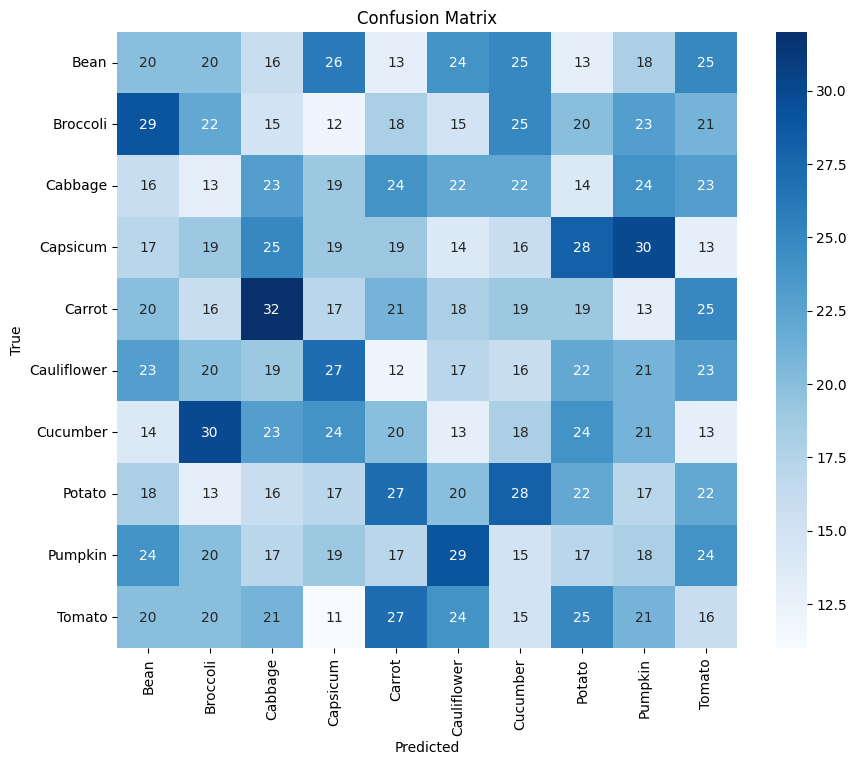

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

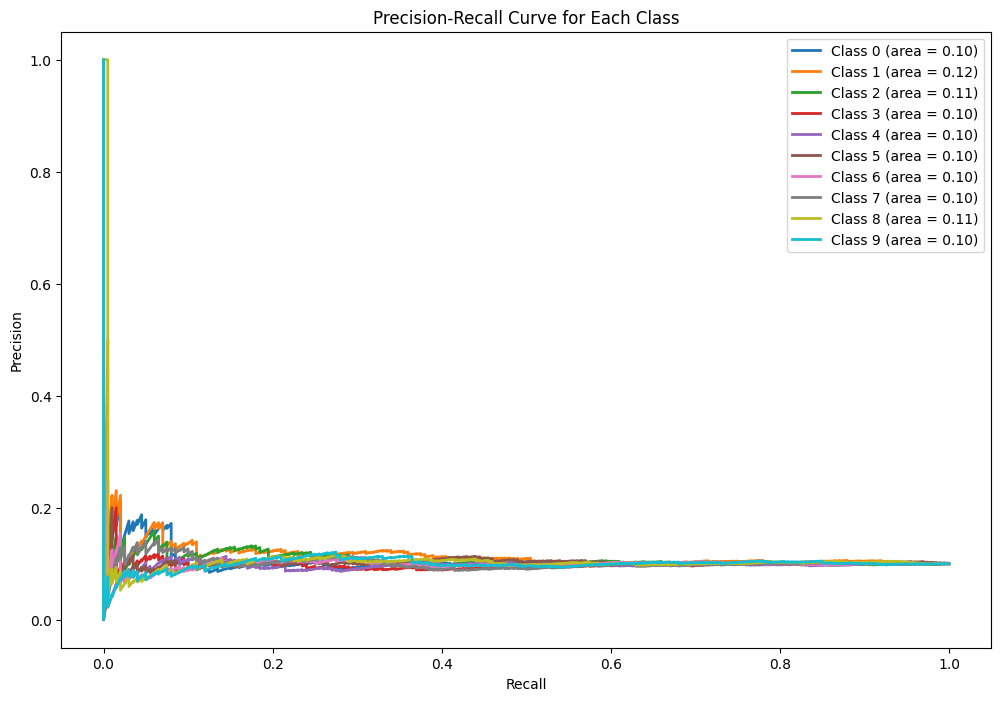

In [27]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming y_true and y_pred_prob are the true labels and predicted probabilities respectively
# Binarize the true labels
n_classes = len(test_generator.class_indices)
y_true_bin = label_binarize(y_true, classes=range(n_classes))

# Calculate precision and recall for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], predictions[:, i])
    average_precision[i] = average_precision_score(y_true_bin[:, i], predictions[:, i])

# Plot precision-recall curve for each class
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (area = {average_precision[i]:0.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend(loc='best')
plt.show()

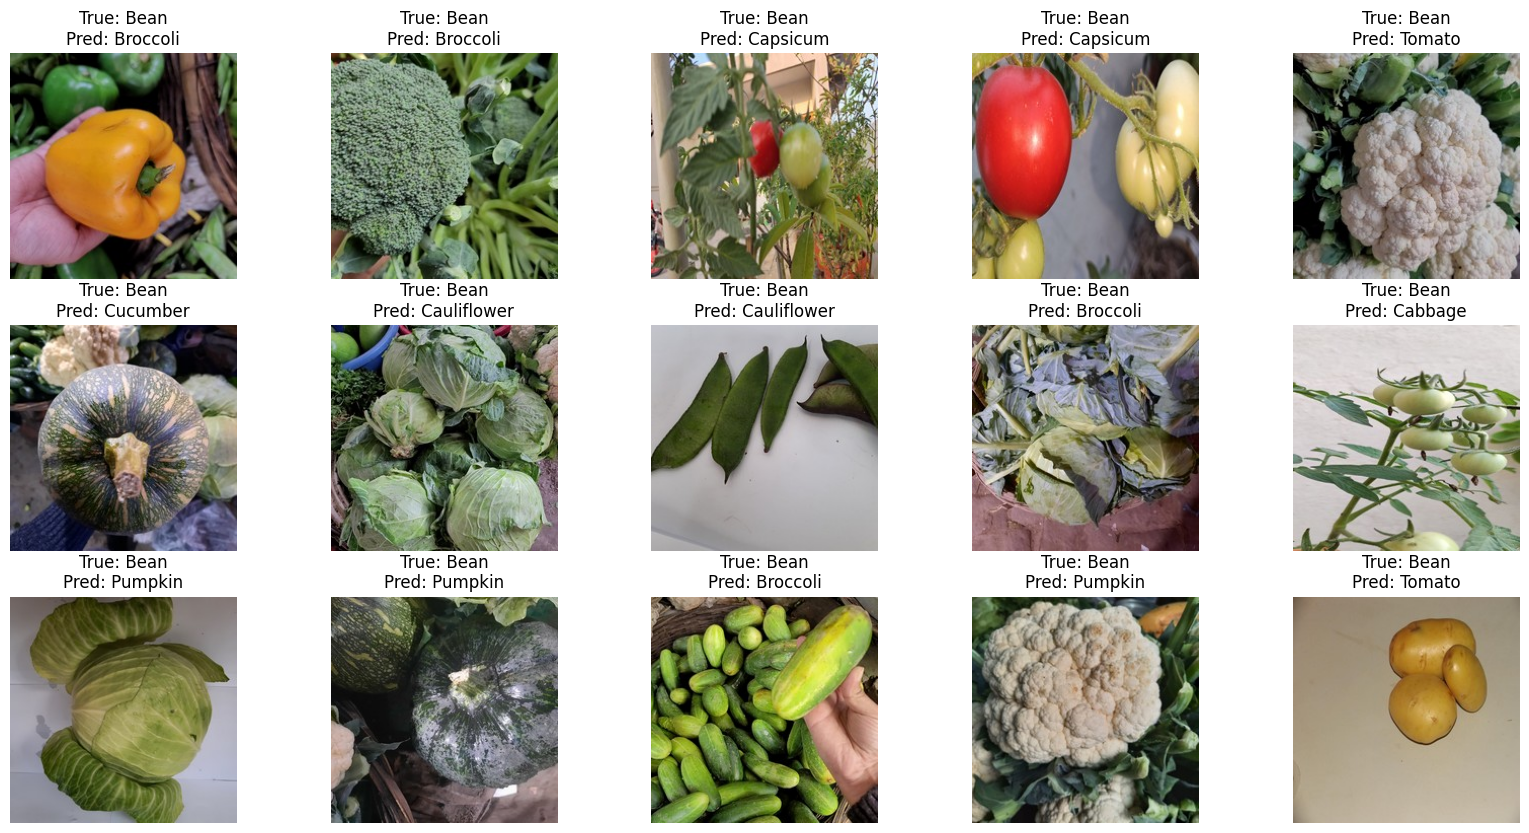

In [40]:
misclassified_indices = np.where(y_pred != y_true)[0]

num_examples = 15 
plt.figure(figsize=(20, 10))
for i, idx in enumerate(misclassified_indices[:num_examples]):
    img, label = test_generator[idx]
    plt.subplot(3, 5, i + 1)
    plt.imshow(img[0])
    true_label = list(test_generator.class_indices.keys())[y_true[idx]]
    pred_label = list(test_generator.class_indices.keys())[y_pred[idx]]
    plt.title(f'True: {true_label}\nPred: {pred_label}')
    plt.axis('off')
plt.show()

Misclassified examples with randomization:

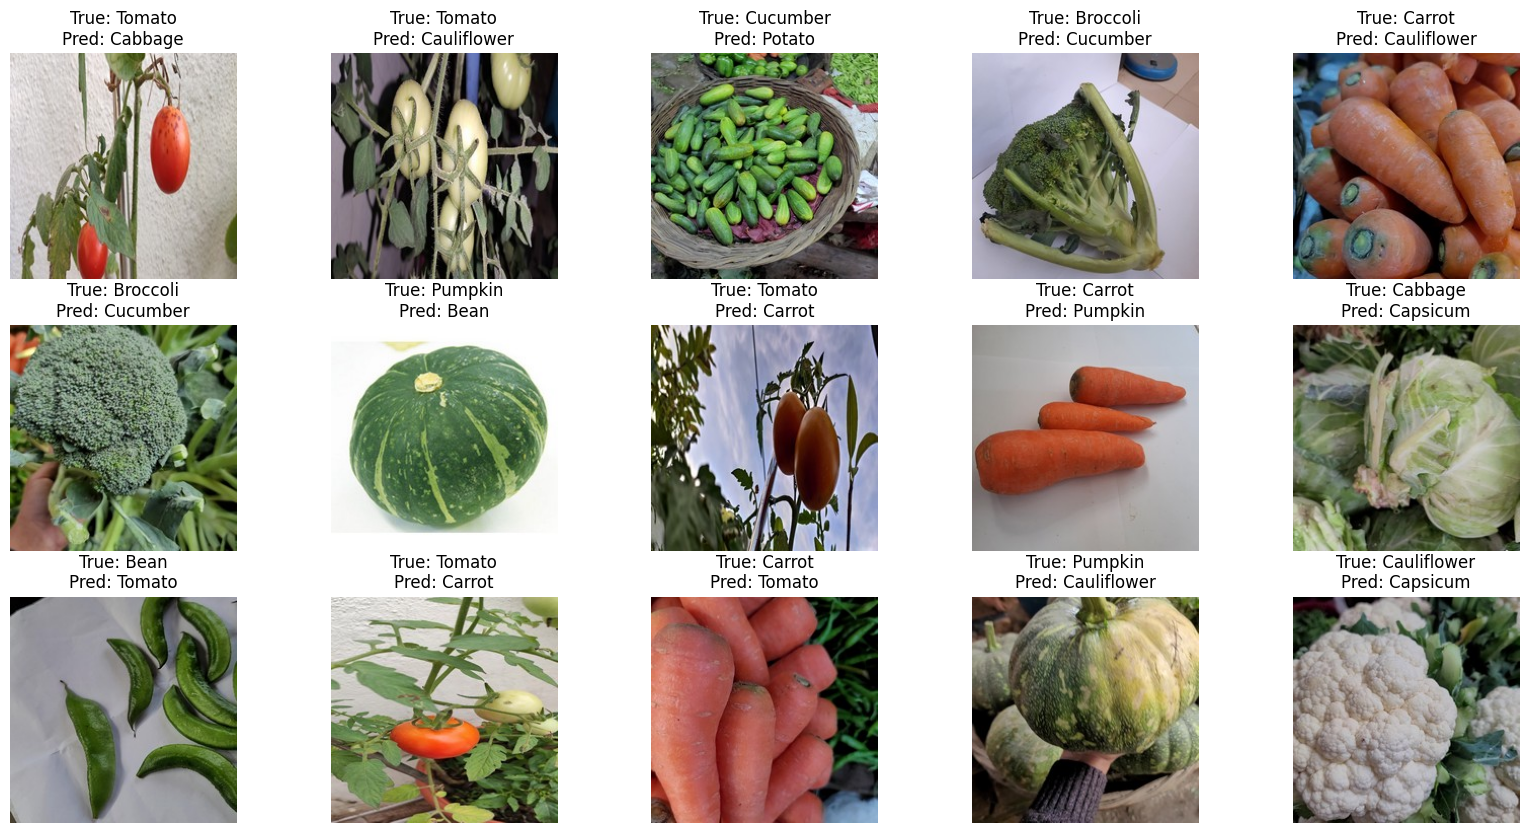

In [39]:
misclassified_indices = np.where(y_pred != y_true)[0]

np.random.shuffle(misclassified_indices)

num_examples = 15
plt.figure(figsize=(20, 10))
for i, idx in enumerate(misclassified_indices[:num_examples]):
    img_path = test_generator.filepaths[idx]
    img = plt.imread(img_path)
    plt.subplot(3, 5, i + 1)
    plt.imshow(img)
    true_label = list(test_generator.class_indices.keys())[y_true[idx]]
    pred_label = list(test_generator.class_indices.keys())[y_pred[idx]]
    plt.title(f'True: {true_label}\nPred: {pred_label}')
    plt.axis('off')
plt.show()

## Conclusion

### **VGG16 Network** 

